In [1]:
import rasterio
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

<font size='5'>Viewing the image to see if it is correct</font>

In [2]:
raster_path = "/kaggle/input/soil-erosion-detect-eda/train.jp2"
with rasterio.open(raster_path, "r", driver="JP2OpenJPEG") as src:
    raster_img = src.read()
    raster_meta = src.meta

In [3]:
raster_img

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

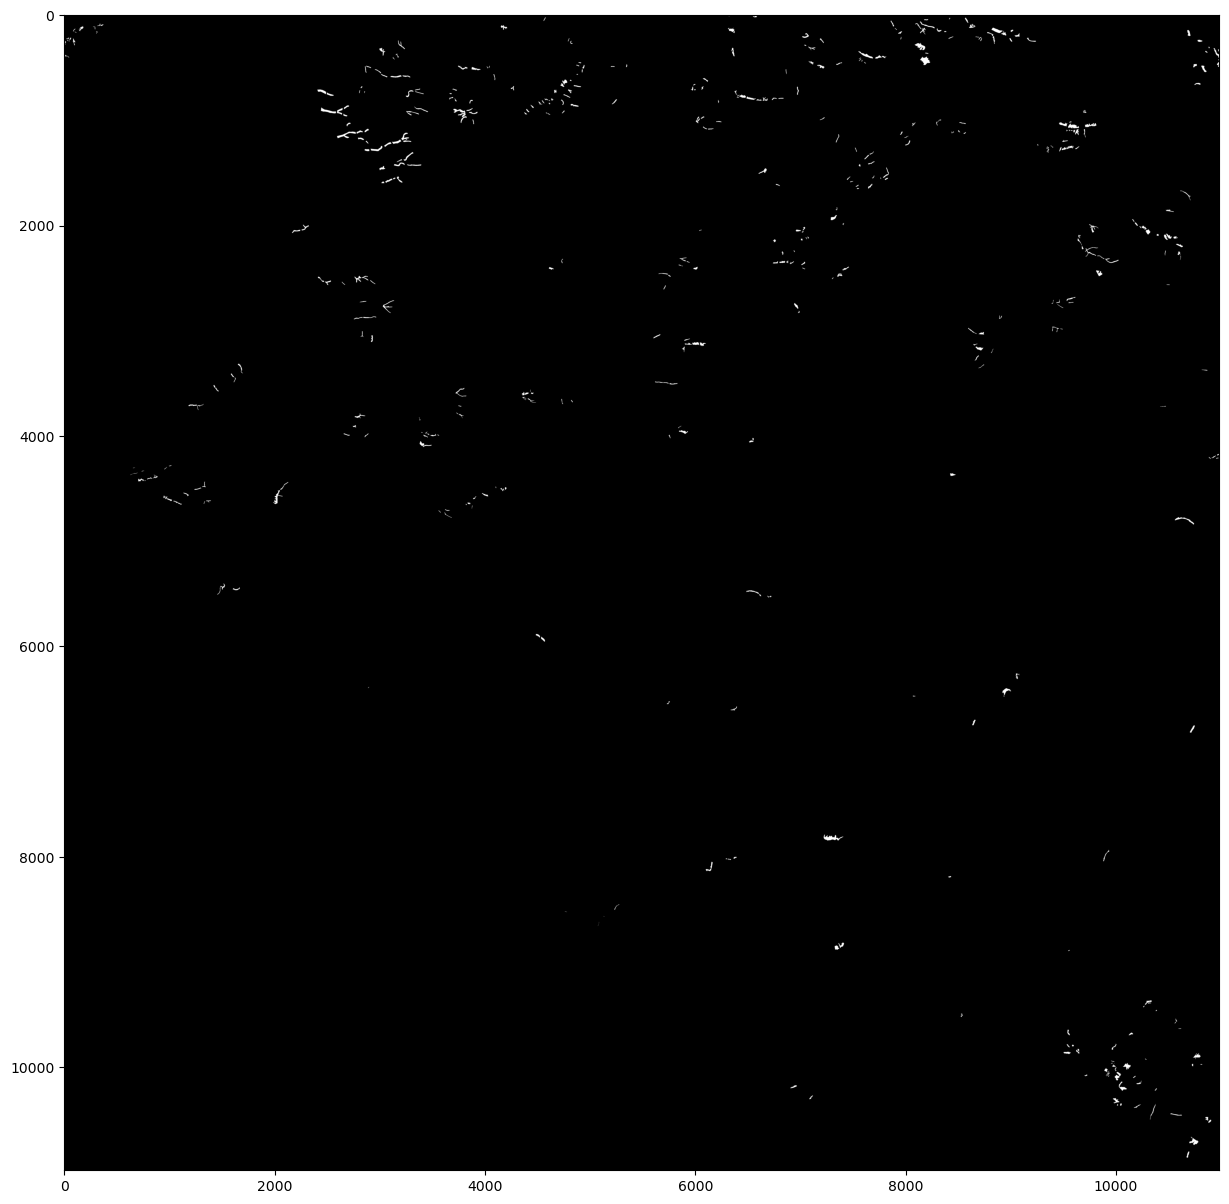

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(raster_img[0],  cmap='gray')

<font size='5'>Split large image (masks) in patches, for memory retentoin</font>

In [5]:
import rasterio
from rasterio.windows import Window

# Open the jp2 image
with rasterio.open('/kaggle/input/soil-erosion-detect-eda/train.jp2') as src:
    width = src.width
    height = src.height
    meta = src.meta

    # Define the size of the patches
    patch_size = 256

    # Loop over the image by incrementing the window
    for i in range(0, width, patch_size):
        for j in range(0, height, patch_size):
            # Define the window to extract the patch
            window = Window(i, j, patch_size, patch_size)

            # Read the patch from the window
            patch = src.read(window=window)

            # Update the metadata of the patch image
            patch_meta = meta.copy()
            patch_meta.update({
                'width': patch.shape[-1],
                'height': patch.shape[-2],
                'transform': rasterio.windows.transform(window, src.transform)
            })

            # Save the patch image to a new file
            with rasterio.open(f'/kaggle/working/mask_{i}_{j}.jp2', 'w', **patch_meta) as dst:
                dst.write(patch)


<font size='5'>Split large image (original .jp2 image) in patches, for memory retentoin</font>

In [6]:
import rasterio
from rasterio.windows import Window

# Open the jp2 image
with rasterio.open('/kaggle/input/sentinel2tile-soil-det-quantum/T36UXV_20200406T083559_TCI_10m.jp2') as src:
    width = src.width
    height = src.height
    meta = src.meta

    # Define the size of the patches
    patch_size = 256

    # Loop over the image by incrementing the window
    for i in range(0, width, patch_size):
        for j in range(0, height, patch_size):
            # Define the window to extract the patch
            window = Window(i, j, patch_size, patch_size)

            # Read the patch from the window
            patch = src.read(window=window)

            # Update the metadata of the patch image
            patch_meta = meta.copy()
            patch_meta.update({
                'width': patch.shape[-1],
                'height': patch.shape[-2],
                'transform': rasterio.windows.transform(window, src.transform)
            })

            # Save the patch image to a new file
            with rasterio.open(f'/kaggle/working/image_{i}_{j}.jp2', 'w', **patch_meta) as dst:
                dst.write(patch)


In [7]:
# patches/images